<a href="https://colab.research.google.com/github/uzair-suria/piaic-dl-assignments/blob/main/regression-car-price/%5Bcompleted%5Dpiaic_car_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

Download Dataset from: https://www.kaggle.com/hellbuoy/car-price-prediction

## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

## Task

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Workflow

1. Load Data

2. Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3. Clean the data if required

4. Prepare Data for Deep Learning Model

4. Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

  * Since `keras` provides and option to give ratio for the holdout validation data, the validation data will not be separated at this stage
  * Traning data will have ratio of 0.7 to the full data.
  * During fitting, the `validation_split` value will be set to 2/7. This way the splitting ratios stated above will be maintained
    * `1*0.7*(2/7)= 0.2`
    * `1*0.7*(5/7)= 0.5`

5. Model
  * Input Layer (No. of features)
  * 3 hidden layers including 10,8,6 unit
  * Output Layer with activation function relu/tanh (check by experiment).

6. Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

7. Train the Model with Epochs (100) and validate it

8. If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

9. Evaluation Step

10. Prediction

# Solution

## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from keras import models, layers

In [ ]:
data_url = 'https://raw.githubusercontent.com/uzair-suria/piaic-dl-assignments/main/regression-car-price/data/car-price-data.xls'

df = pd.read_csv(data_url)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data_dict_url = 'https://raw.githubusercontent.com/uzair-suria/piaic-dl-assignments/main/regression-car-price/data/car-prices-data-dictionary.csv'
df_dict = pd.read_csv(data_dict_url, header=None)
pd.set_option('display.max_colwidth', 150)
df_dict

,0,1
0,Car_ID,Unique id of each observation (Interger)
1,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
2,carCompany,Name of car company (Categorical)
3,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Aspiration used in a car (Categorical)
5,doornumber,Number of doors in a car (Categorical)
6,carbody,body of car (Categorical)
7,drivewheel,type of drive wheel (Categorical)
8,enginelocation,Location of car engine (Categorical)
9,wheelbase,Weelbase of car (Numeric)


## Check for Missing Data

In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Cleaning Data

Feature `car_ID` just represents the order in which the data was recorded. It has no significance to the price of the car. Therefore, this column will be dropped

In [ ]:
df.drop('car_ID', axis=1, inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
 df['CarName'] = df['CarName'].apply(lambda x: x.split(' ')[0])
 df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Correcting manufacturer name misspellings...

In [ ]:
df['CarName'] = df['CarName'].str.lower()
def name_corrector(wrong_name, correct_name, df):
  df.CarName.replace(wrong_name, correct_name, inplace=True)

name_corrector('maxda', 'mazda', df)
name_corrector('porcshce', 'porsche', df)
name_corrector('toyouta', 'toyota', df)
name_corrector('vokswagen', 'volkswagen', df)
name_corrector('vw', 'volkswagen', df)

df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Splitting Data

In [ ]:
X = df.drop('price', axis=1).copy(deep=True)
y = df['price'].copy(deep=True)

In [ ]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [ ]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Data Preparation

In [ ]:
numeric_cols = X.select_dtypes(include='number').columns.values
cat_cols = X.select_dtypes(include='object').columns.values

In [ ]:
numeric_cols

array(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg'], dtype=object)

In [ ]:
cat_cols

array(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'], dtype=object)

In [ ]:
transformers_list = []
for cat in cat_cols:
    transformers_list.append(
        (f'cat_ohe_{cat}', OneHotEncoder(categories=[X[cat].unique().tolist()]), [cat])
    )
transformers_list.append(('StandardScaler', StandardScaler(), numeric_cols))
column_transformer = ColumnTransformer(transformers=transformers_list, remainder='passthrough')

In [ ]:
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [ ]:
X_train_transformed.shape

(143, 74)

In [ ]:
X_test_transformed.shape

(62, 74)

## Model

In [ ]:
model = models.Sequential()

model.add(layers.Dense(72, activation='relu'))
model.add(layers.Dense(54, activation='relu'))
model.add(layers.Dense(36, activation='relu'))
model.add(layers.Dense(18, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(3, activation='relu'))

# model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(8, activation='relu'))
# model.add(layers.Dense(6, activation='relu'))


model.add(layers.Dense(1, activation='relu'))

## Compilation


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## Training and Model Tuning

In [ ]:
history = model.fit(X_train_transformed, y_train.to_numpy(), validation_split=2/7, epochs=250)

Epoch 1/250
4/4 [==============================] - 1s 161ms/step - loss: 220359708.8000 - mae: 12790.3871 - val_loss: 227862528.0000 - val_mae: 13230.5518
Epoch 2/250
4/4 [==============================] - 0s 17ms/step - loss: 227442729.6000 - mae: 12856.3225 - val_loss: 227845296.0000 - val_mae: 13229.9893
Epoch 3/250
4/4 [==============================] - 0s 18ms/step - loss: 235363731.2000 - mae: 12979.1008 - val_loss: 227819392.0000 - val_mae: 13229.1367
Epoch 4/250
4/4 [==============================] - 0s 19ms/step - loss: 228619731.2000 - mae: 12956.0812 - val_loss: 227784480.0000 - val_mae: 13227.9941
Epoch 5/250
4/4 [==============================] - 0s 17ms/step - loss: 238190697.6000 - mae: 13164.1154 - val_loss: 227737168.0000 - val_mae: 13226.4512
Epoch 6/250
4/4 [==============================] - 0s 17ms/step - loss: 248057347.2000 - mae: 13265.2246 - val_loss: 227671296.0000 - val_mae: 13224.3008
Epoch 7/250
4/4 [==============================] - 0s 17ms/step - loss: 222

In [ ]:
training_history = history.history
training_history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:
err_train = training_history['mae']
err_val = training_history['val_mae']
epochs = range(1, len(err_val)+1)

In [ ]:
err_train[:10]

[12929.69140625,
 12929.357421875,
 12928.7392578125,
 12927.869140625,
 12926.7158203125,
 12925.1103515625,
 12922.81640625,
 12919.5283203125,
 12914.8330078125,
 12907.7802734375]

Plotting Training and Validation Error

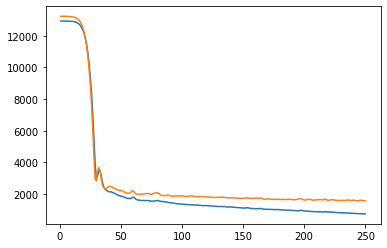

In [ ]:
fig, ax = plt.subplots(1)
training_error = ax.plot(epochs, err_train, label='Training Error')
validation_error = ax.plot(epochs, err_val, label='Validation Error')

Zooming in at the end to get clearer picture...

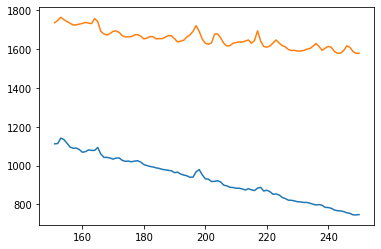

In [ ]:
fig, ax = plt.subplots(1)
training_error = ax.plot(epochs[150:], err_train[150:], label='Training Error')
validation_error = ax.plot(epochs[150:], err_val[150:], label='Validation Error')

Validation error is least around 200th epoch

In [ ]:
model2 = models.Sequential()

model2.add(layers.Dense(72, activation='relu'))
model2.add(layers.Dense(54, activation='relu'))
model2.add(layers.Dense(36, activation='relu'))
model2.add(layers.Dense(18, activation='relu'))
model2.add(layers.Dense(9, activation='relu'))
model2.add(layers.Dense(3, activation='relu'))

model2.add(layers.Dense(1, activation='relu'))
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])
model2.fit(X_train_transformed, y_train.to_numpy(), validation_split=2/7, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 69ms/step - loss: 214099289.6000 - mae: 12742.4209 - val_loss: 227866624.0000 - val_mae: 13230.6553
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 222231840.0000 - mae: 13003.1818 - val_loss: 227859056.0000 - val_mae: 13230.3994
Epoch 3/200
4/4 [==============================] - 0s 18ms/step - loss: 237983177.6000 - mae: 13192.7473 - val_loss: 227849488.0000 - val_mae: 13230.0811
Epoch 4/200
4/4 [==============================] - 0s 20ms/step - loss: 236627478.4000 - mae: 13099.2646 - val_loss: 227836560.0000 - val_mae: 13229.6523
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 227178851.2000 - mae: 13025.6318 - val_loss: 227818528.0000 - val_mae: 13229.0469
Epoch 6/200
4/4 [==============================] - 0s 17ms/step - loss: 223500364.8000 - mae: 12903.7629 - val_loss: 227793424.0000 - val_mae: 13228.2041
Epoch 7/200
4/4 [==============================] - 0s 18ms/step - loss: 2311

## Evaluation

In [ ]:
model2.evaluate(X_test_transformed, y_test.to_numpy())

2/2 [==============================] - 0s 4ms/step - loss: 7622800.5000 - mae: 2035.0502


[7622800.5, 2035.0501708984375]

`model2` had MAE of `1807.76` on completely unseen test data

In [ ]:
y_test_preds = model2.predict(X_test_transformed)
y_test_preds

array([[ 6844.8623],
       [14767.675 ],
       [ 6463.4663],
       [14058.608 ],
       [34811.6   ],
       [ 6785.0396],
       [18300.29  ],
       [ 6853.362 ],
       [19141.379 ],
       [ 9232.321 ],
       [ 6824.289 ],
       [11675.12  ],
       [ 7110.8984],
       [15918.473 ],
       [ 6866.376 ],
       [ 6697.773 ],
       [12263.359 ],
       [ 9240.37  ],
       [ 6686.135 ],
       [14436.253 ],
       [ 7345.157 ],
       [ 6525.632 ],
       [ 6556.7046],
       [12100.053 ],
       [38982.29  ],
       [ 8393.915 ],
       [22366.598 ],
       [13948.554 ],
       [ 9922.662 ],
       [ 8909.814 ],
       [ 8502.078 ],
       [ 8018.9595],
       [ 6889.144 ],
       [15647.009 ],
       [20290.312 ],
       [ 8696.87  ],
       [16037.298 ],
       [28925.092 ],
       [ 7841.255 ],
       [17225.37  ],
       [10894.682 ],
       [12638.634 ],
       [ 9579.713 ],
       [ 9222.37  ],
       [19898.85  ],
       [20581.729 ],
       [26208.607 ],
       [38631